**Information:** *Some commonly used statistical methods which are useful tools for analyzing data in machine learning*

**Written by:** *Zihao Xu*

**Last update date:** *06.01.2021*

# Simple Random Variables
In Python, a common method to define a random variable and sample from it is to use the statistical functionality of **``scipy.stats``**.

Note in **``scipy.stats``**, drawing random numbers relies on generators from **[``numpy.random``](https://numpy.org/doc/stable/reference/random/index.html)** package. So we usually only needs to explicit seed a global variable by calling **``numpy.random.seed()``** method to ensure reproducibility. Assigning random state is not discussed here since I can not see any necessity of it in the context of this notebook.

For all the attributes in it, read the [document of **``scipy.stats``**](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [1]:
import scipy.stats as st
import numpy as np
np.random.seed(123)

## Discrete Random Variables
### The Bernoulli Distribution and basic operations for discrete random variables
Define a Bernoulli distribution by specifying the probability of $1$

Call the **``bernoulli(theta)``** method

In [2]:
theta = 0.8
X = st.bernoulli(theta)

**``support()``** method gives which values it takes

In [3]:
print('X takes values in', X.support())

X takes values in (0, 1)


**``pmf()``** method gives the probability mass function at each point of the support

In [4]:
for x in X.support():
    print('p(X=%d) = %f' % (x, X.pmf(x)))

p(X=0) = 0.200000
p(X=1) = 0.800000


**``expectation()``** method gives the expectation of the random variable

In [5]:
print('E[X] = %f' % (X.expect()))

E[X] = 0.800000


**``var()``** method gives the variance of the random variable

In [6]:
print('V[X] = %f' % (X.var()))

V[X] = 0.160000


Use **``rvs(size)``** method to sample from the random variable with desired shape

In [7]:
xs = X.rvs(size=(4, 3))
print(xs)

[[1 1 1]
 [1 1 1]
 [0 1 1]
 [1 1 1]]


Use **``entropy()``** method to get the information entropy

In [8]:
print('H[X] = %f'%(X.entropy()))

H[X] = 0.500402


**Histogram** of the samples counts the number of samples taking each value and is one common way to visualize the sampling result.

Use **``hist()``** method in **``matplotlib.pyplot``**

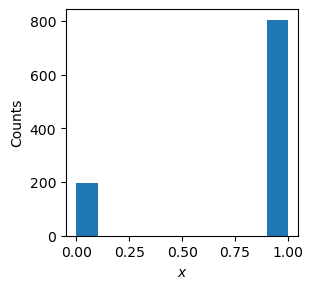

In [9]:
import matplotlib.pyplot as plt

xs = X.rvs(size=1000)
fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
ax.hist(xs)
ax.set_xlabel('$x$')
ax.set_ylabel('Counts')
plt.show()

Use **``bar()``** method in **``matplotlib.pyplot``** to visualize the probability mass function

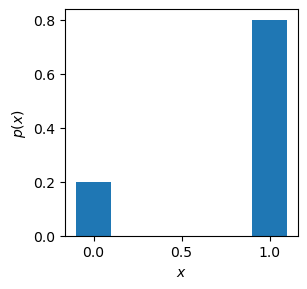

In [10]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
ax.bar(x=X.support(), height=X.pmf(X.support()), width=0.2)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

### The Categorical Distribution
Specify all the possible values and corresponding probabilities

Call the **``rv_discrete(name,values=(value,probability))``** method

X takes values in (1, 4)
All possible values are [1 2 3 4]
p(X=1) = 0.100000
p(X=2) = 0.300000
p(X=3) = 0.400000
p(X=4) = 0.200000
E[X] = 2.700000
V[X] = 0.810000
H[X] = 1.279854


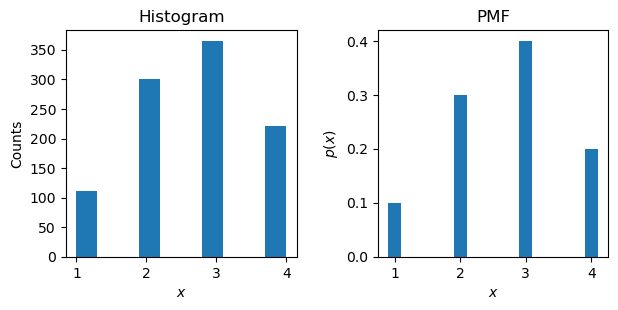

In [11]:
# Define all the possible values
x_values = np.array([1, 2, 3, 4])
# The probabilities need to sum to 1
px = np.array([0.1, 0.3, 0.4, 0.2])
# Define the random variable
X = st.rv_discrete(name='Custom Categorical', values=(x_values, px))
# Show the basic properties of it
print('X takes values in', X.support())
print('All possible values are', x_values)
for x in x_values:
    print('p(X=%d) = %f' % (x, X.pmf(x)))
print('E[X] = %f' % (X.expect()))
print('V[X] = %f' % (X.var()))
print('H[X] = %f'%(X.entropy()))
xs = X.rvs(size=(1000))
fig, axes = plt.subplots(1, 2, figsize=(7, 3), dpi=100)
axes[0].hist(xs)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('Counts')
axes[0].set_title('Histogram')
axes[1].bar(x=x_values, height=X.pmf(x_values), width=0.2)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_title('PMF')
plt.subplots_adjust(wspace=0.35)
plt.show()

### The Binomial Distribution
Specify the times of experiments and probability of success of each time

Call the **``binom()``** method

X takes values in (0, 5)
All possible values are [0 1 2 3 4 5]
p(X=0) = 0.010240
p(X=1) = 0.076800
p(X=2) = 0.230400
p(X=3) = 0.345600
p(X=4) = 0.259200
p(X=5) = 0.077760
E[X] = 3.000000
V[X] = 1.200000
H[X] = 1.497998


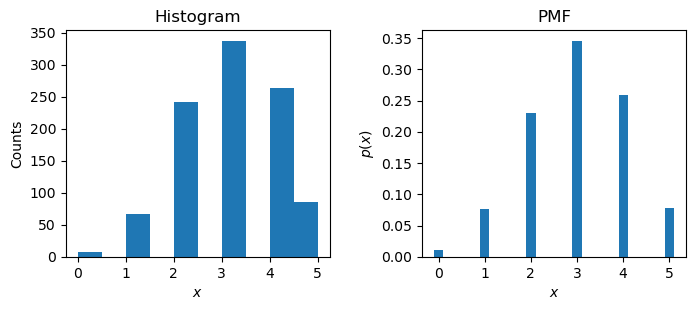

In [12]:
# Spcify the times of experiments
n = 5
# Specify the probability of success of each time
theta = 0.6
# Define the random variable
X = st.binom(n, theta)
# Show the basic properties of it
print('X takes values in', X.support())
x_range = np.arange(n + 1)
print('All possible values are', x_range)
for x in x_range:
    print('p(X=%d) = %f' % (x, X.pmf(x)))
print('E[X] = %f' % (X.expect()))
print('V[X] = %f' % (X.var()))
print('H[X] = %f'%(X.entropy()))
xs = X.rvs(size=(1000))
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=100)
axes[0].hist(xs)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('Counts')
axes[0].set_title('Histogram')
axes[1].bar(x=x_range, height=X.pmf(x_range), width=0.2)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_title('PMF')
plt.subplots_adjust(wspace=0.35)
plt.show()

### The Poisson Distribution
Specify the rate with each the events occur

Call **``possion()``** method

p(X=0) = 0.367879
p(X=1) = 0.367879
p(X=2) = 0.183940
p(X=3) = 0.061313
p(X=4) = 0.015328
p(X=5) = 0.003066
E[X] = 1.000000
V[X] = 1.000000
H[X] = 1.304842


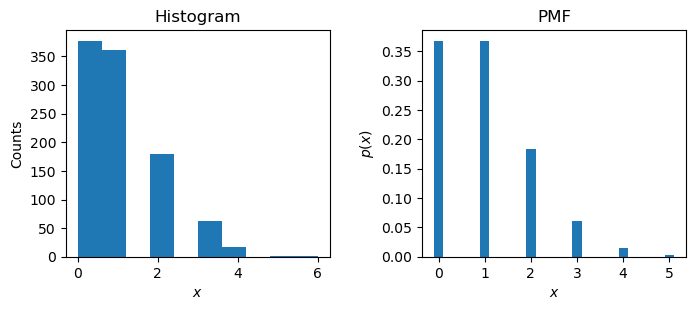

In [13]:
# The rate with each the events occur
lam = 1.
# Define the random variable
X = st.poisson(lam)
# Show the basic properties of it
x_range = np.arange(6)
for x in x_range:
    print('p(X=%d) = %f' % (x, X.pmf(x)))
print('E[X] = %f' % (X.expect()))
print('V[X] = %f' % (X.var()))
print('H[X] = %f'%(X.entropy()))
xs = X.rvs(size=(1000))
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=100)
axes[0].hist(xs)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('Counts')
axes[0].set_title('Histogram')
axes[1].bar(x=x_range, height=X.pmf(x_range), width=0.2)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_title('PMF')
plt.subplots_adjust(wspace=0.35)
plt.show()

## Continuous Random Variables
### The Uniform Distribution and basic operations for continuous random variables
Specify the interval $[a,b]$ where the random variable is distributed uniformly

Call the **``uniform(loc,scale)``** method

In [14]:
# Left bound
a = -2.0
# Right bound
b = 5.0
# Define the random variable
X = st.uniform(loc=a, scale=(b - a))

Use **``pdf()``** method to get the probability density function

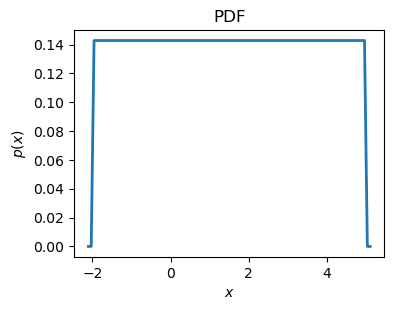

In [15]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
x = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(x, X.pdf(x), lw=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title('PDF')
plt.show()

Use **``cdf()``** method to get the cumulative distribution function

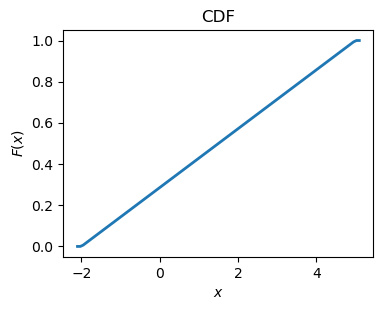

In [16]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
x = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(x, X.cdf(x), lw=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$')
ax.set_title('CDF')
plt.show()

Other properties can be got use similar methods as for discrete random variables

E[X] = 1.500000
V[X] = 4.083333
H[X] = 1.945910


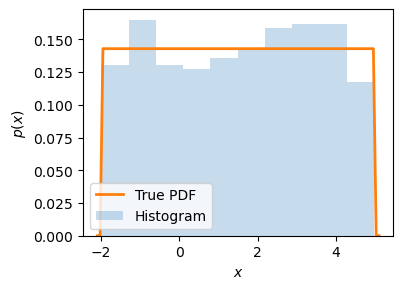

In [17]:
print('E[X] = %f' % (X.expect()))
print('V[X] = %f' % (X.var()))
print('H[X] = %f'%(X.entropy()))
x = np.linspace(a - 0.1, b + 0.1, 100)
xs = X.rvs(size=(1000))
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax.hist(xs, density=True, alpha=0.25, label='Histogram')
ax.plot(x, X.pdf(x), lw=2, label='True PDF')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.legend(loc='best')
plt.show()

We can also obtain $X\sim U([a,b])$ from $Z\sim U[(0,1)]$ by $$X=a+(b-a)Z$$

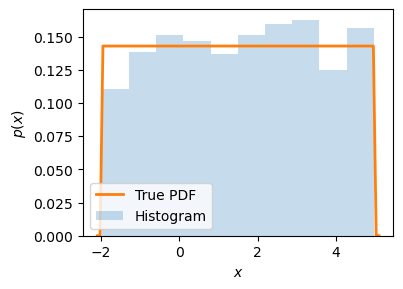

In [18]:
x = np.linspace(a - 0.1, b + 0.1, 100)
# np.random.rand gives the uniform distribution over [0,1]
xs = a + (b - a) * np.random.rand(1000)
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax.hist(xs, density=True, alpha=0.25, label='Histogram')
ax.plot(x, X.pdf(x), lw=2, label='True PDF')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.legend(loc='best')
plt.show()

### The Normal Distribution
Simple call **``norm()``** defines the standard normal distribution

E[X] = 0.000000
V[X] = 1.000000
H[X] = 1.945910


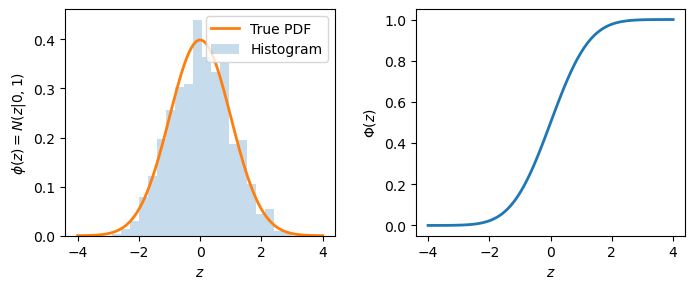

In [19]:
# Define the random variable
Z = st.norm()
# Show some basic properties
print('E[X] = %f' % (Z.expect()))
print('V[X] = %f' % (Z.var()))
print('H[X] = %f'%(X.entropy()))
z = np.linspace(-4, 4, 100)
zs = Z.rvs(size=(1000))
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=100)
axes[0].hist(zs, bins=20, density=True, alpha=0.25, label='Histogram')
axes[0].plot(z, Z.pdf(z), lw=2, label='True PDF')
axes[0].set_xlabel('$z$')
axes[0].set_ylabel('$\phi(z)=N(z|0,1)$')
axes[0].legend(loc='best')
axes[1].plot(z, Z.cdf(z), lw=2)
axes[1].set_xlabel('$z$')
axes[1].set_ylabel('$\Phi(z)$')
plt.subplots_adjust(wspace=0.3)
plt.show()

Use **``ppf(q/100)``** to get the $q\%$ quantile $z_q$

In [20]:
z_025 = Z.ppf(2.5 / 100.0)
z_500 = Z.ppf(50.0 / 100.0)
z_975 = Z.ppf(97.5 / 100.0)
print('2.5%% quantile of Z = %1.2f' % (z_025))
print('50%% quantile of Z = %1.2f' % z_500)
print('97.5%% quantile of Z = %1.2f' % z_975)

2.5% quantile of Z = -1.96
50% quantile of Z = 0.00
97.5% quantile of Z = 1.96


Define any normal by specifying the mean $\mu$ and the standard deviation $\sigma$: $$X\sim\mathcal{N}(\mu,\sigma^2)$$

E[X] = 1.000000
V[X] = 4.000000
H[X] = 2.112086


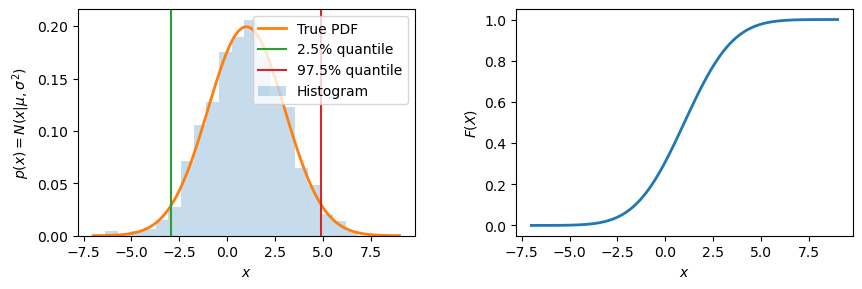

In [21]:
# Mean
mu = 1
# Standard deviation
sigma = 2
# Define the random variable
X = st.norm(mu, sigma)
# Basic properties
print('E[X] = %f' % (X.expect()))
print('V[X] = %f' % (X.var()))
print('H[X] = %f'%(X.entropy()))
x = np.linspace(mu - 8, mu + 8, 100)
xs = X.rvs(size=(1000))
fig, axes = plt.subplots(1, 2, figsize=(10, 3), dpi=100)
axes[0].hist(xs, bins=20, density=True, alpha=0.25, label='Histogram')
axes[0].plot(x, X.pdf(x), lw=2, label='True PDF')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$p(x)=N(x|\mu,\sigma^2)$')
x_025 = X.ppf(2.5 / 100)
x_975 = X.ppf(97.5 / 100)
axes[0].plot(x_025 * np.ones(2), axes[0].set_ylim(), label='2.5% quantile')
axes[0].plot(x_975 * np.ones(2), axes[0].set_ylim(), label='97.5% quantile')
axes[0].legend(loc='best')
axes[1].plot(x, X.cdf(x), lw=2)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$F(X)$')
plt.subplots_adjust(wspace=0.3)
plt.show()

Also can get any normal distribution $X\sim\mathcal{N}(\mu,\sigma^2)$ using the standard normal distribution $Z\sim\mathcal{N}(0,1)$: $$X=\mu+\sigma Z$$

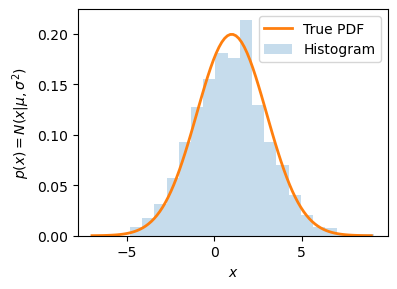

In [22]:
Z = st.norm()
mu, sigma = 1, 2
X = st.norm(mu, sigma)
x = np.linspace(mu - 8, mu + 8, 100)
xs = mu + sigma * Z.rvs(size=(1000))
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax.hist(xs, bins=20, density=True, alpha=0.25, label='Histogram')
ax.plot(x, X.pdf(x), lw=2, label='True PDF')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)=N(x|\mu,\sigma^2)$')
ax.legend(loc='best')
plt.subplots_adjust(wspace=0.3)
plt.show()

%%latex
\newpage

# Collections of Random Variables
Consider the joint probability mass function of two discrete random variables

Take two discrete random variables $X$ and $Y$. Say $X$ takes $m$ values $0,1,\cdots,m-1$ and $Y$ takes $n$ values $0,1,\cdots,n-1$. Then the joint probability mass function of $X$ and $Y$ can be viewed as the $m\times n$ matrix: $$A_{i,j}=p(X=i,Y=j)$$

In [23]:
# Take m = 4, n = 3 as an example
A = np.random.rand(4, 3)
# Scale the matrix so that the elements sum to 1
A = A / np.sum(A)
print(A)
print('Sum of elements in A is: %1.2f' % np.sum(A))

[[0.11736006 0.09213332 0.12528823]
 [0.12411247 0.06798429 0.05991044]
 [0.03254855 0.09134394 0.11771173]
 [0.09943759 0.05207599 0.02009339]]
Sum of elements in A is: 1.00


Sum over the second axis gets the marginal distribution of $X$: $$p(x)=\underset{y}{\Sigma}p(x,y)$$

In [24]:
p_x = np.sum(A, axis=1)
print('Marginal Distribution of X is:', p_x)
print('Sum of marginal probabilities is %f' % np.sum(p_x))

Marginal Distribution of X is: [0.33478161 0.25200721 0.24160421 0.17160698]
Sum of marginal probabilities is 1.000000


Find the expectation of $X$: $$\mathbb{E}[X]=\underset{x}{\Sigma}xp(x)$$

In [25]:
E_X = np.sum(np.arange(4) * p_x)
print('E[X] = %1.2f' % E_X)

E[X] = 1.25


Find the variance of $X$: $$\mathbb{V}[X]=\mathbb{E}[(X-\mathbb{E}[X])^2]=\mathbb{E}[X^2]-(\mathbb{E}[X])^2$$

In [26]:
E_X2 = np.sum(np.arange(4)**2 * p_x)
V_X = E_X2 - E_X**2
print('V[X] = %1.2f' % V_X)

V[X] = 1.20


Do the same for Y

In [27]:
p_y = np.sum(A, axis=0)
print('Marginal Distribution of Y is:', p_y)
print('Sum of marginal probabilities is %f' % np.sum(p_y))
E_Y = np.sum(np.arange(3) * p_y)
print('E[Y] = %1.2f' % E_Y)
E_Y2 = np.sum(np.arange(3)**2 * p_y)
V_Y = E_Y2 - E_Y**2
print('V[Y] = %1.2f' % V_Y)

Marginal Distribution of Y is: [0.37345868 0.30353753 0.32300379]
Sum of marginal probabilities is 1.000000
E[Y] = 0.95
V[Y] = 0.69


Find the covariance of the two random variables: $$\mathbb{C}[X,Y]=\underset{x,y}{\Sigma}(x-\mathbb{E}[X])(y-\mathbb{E}[Y])p(x,y)$$

In [28]:
C_XY = 0.0
for x in range(4):
    for y in range(3):
        C_XY += (x - E_X) * (y - E_Y) * A[x, y]
print('C[X,Y] = %1.2f' % C_XY)

C[X,Y] = -0.07


To sample from $(X,Y)$, we need to sample a set of index $(i,j)$ with probability $A_{i,j}$. It's like sampling from a categorical distribution with $m\times n=mn$ different labels $c_0=(0,0),c_1=(0,1),\cdots,c_{mn-1}=(m-1,n-1)$ with each a probability $A_{0,0},A_{0,1},\cdots,A_{m-1,n-1}$

In practice, sample a label $c_k$ and then turn in label to $i$ and $j$ by $$\begin{aligned}i&=k//n\\j&=k\text{ mod }n\end{aligned}$$

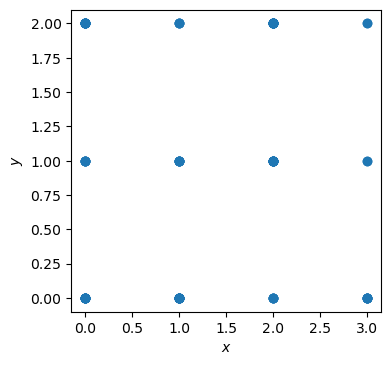

In [29]:
# Define the random variable
XY = st.rv_discrete('Joint XY', values=(np.arange(12), A.reshape(12)))


# The function to sample c_k and transform label k to (i,j)
def sample_XY():
    """
    Samples X and Y once
    """
    k = XY.rvs()
    i = k // 3
    j = k % 3
    return i, j


# Sample from XY
num_samples = 100
x_samples = np.zeros((num_samples), dtype=int)
y_samples = np.zeros((num_samples), dtype=int)
for ii in range(num_samples):
    x_samples[ii], y_samples[ii] = sample_XY()
# Visualize the sampling result
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
ax.scatter(x_samples, y_samples)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

Try for a larger distribution where $m=60,n=50$

In [30]:
m, n = 60, 50
A = np.random.rand(m, n)
A = A / np.sum(A)
p_x = np.sum(A, axis=1)
E_X = np.sum(np.arange(m) * p_x)
print('E[X] = %1.2f' % E_X)
E_X2 = np.sum(np.arange(m)**2 * p_x)
V_X = E_X2 - E_X**2
print('V[X] = %1.2f' % V_X)
p_y = np.sum(A, axis=0)
E_Y = np.sum(np.arange(n) * p_y)
print('E[Y] = %1.2f' % E_Y)
E_Y2 = np.sum(np.arange(n)**2 * p_y)
V_Y = E_Y2 - E_Y**2
print('V[Y] = %1.2f' % V_Y)
C_XY = 0.0
for x in range(m):
    for y in range(n):
        C_XY += (x - E_X) * (y - E_Y) * A[x, y]
print('C[X,Y] = %1.2f' % C_XY)

E[X] = 29.64
V[X] = 303.68
E[Y] = 24.11
V[Y] = 209.01
C[X,Y] = 2.90


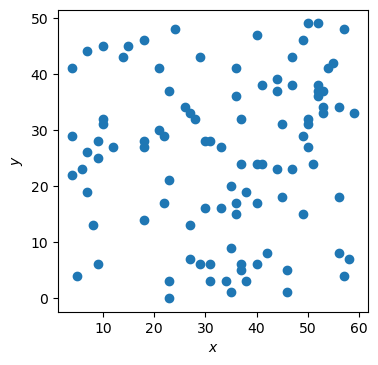

In [31]:
# Define the random variable
XY = st.rv_discrete('Joint XY', values=(np.arange(m * n), A.reshape(-1)))


# The function to sample c_k and transform label k to (i,j)
def sample_XY():
    """
    Samples X and Y once
    """
    k = XY.rvs()
    i = k // n
    j = k % n
    return i, j


# Sample from XY
num_samples = 100
x_samples = np.zeros((num_samples), dtype=int)
y_samples = np.zeros((num_samples), dtype=int)
for ii in range(num_samples):
    x_samples[ii], y_samples[ii] = sample_XY()
# Visualize the sampling result
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
ax.scatter(x_samples, y_samples)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

%%latex
\newpage

# The Multivariate Normal
## Diagonal Covariance Case
To define the $N$-dimensional multivariate normal with diagonal covariance $$\mathbf{X}\sim\mathcal{N}(\boldsymbol{\mu},\text{diag}(\sigma_1^2,\cdots,\sigma_n^2))$$ where $\boldsymbol{\mu}$ is an $N$-dimensional vector and $\sigma_i$ are positive numbers, call the **``multivariate_normal(mean=mu, cov=Sigma)``** method

In [32]:
# Define the mean vector
mu = [1.0, 2.0]
# Define the variance of each component
sigma2 = np.array([1.5, 0.8])**2
# Build the covariance matrix
Sigma = np.diag(sigma2)
# Define the random variable
X = st.multivariate_normal(mean=mu, cov=Sigma)

Take a sample from it

In [33]:
X.rvs()

array([-0.79612333,  1.1444333 ])

Evaluate the PDF at one point 

In [34]:
X.pdf([0.5, -1.0])

0.0001108864139020332

Plot a contour to visualize the PDF

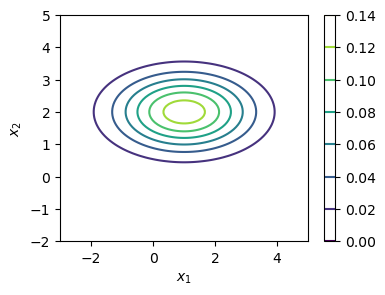

In [35]:
# Points along x1 direction
x1 = np.linspace(mu[0] - 4, mu[0] + 4, 100)
# Points alone x2 direction
x2 = np.linspace(mu[1] - 4, mu[0] + 4, 100)
# Create the grid
X1, X2 = np.meshgrid(x1, x2)
# Reshape these two grids into location lists
X_loc = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])
# Evalute the PDF at all there locations
p_x = X.pdf(X_loc)
# Reshape p_x to grid-shape
P_X = p_x.reshape(100, 100)
# Plot the contours
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
c = ax.contour(X1, X2, P_X)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(mappable=c, ax=ax)
plt.show()

Take some samples from X and add them in the contour figure

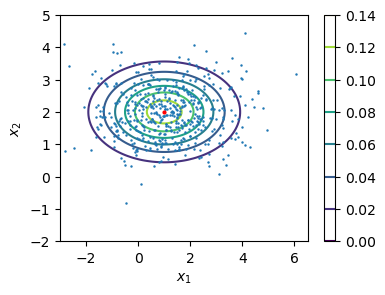

In [36]:
num_samples = 500
x_samples = X.rvs(size=num_samples)
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=1.5)
# Mark the mean in red
ax.plot(X.mean[0], X.mean[1], 'ro', markersize=2)
c = ax.contour(X1, X2, P_X)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(mappable=c, ax=ax)
plt.show()

## Full Covariance Case
To define the $N$-dimensional multivariate normal $$\mathbf{X}\sim\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$$ where $\boldsymbol{\mu}$ is an $N$-dimensional vector and $\boldsymbol{\Sigma}$ is a *positive-definite matrix*, call the **``multivariate_normal(mean=mu, cov=Sigma)``** method

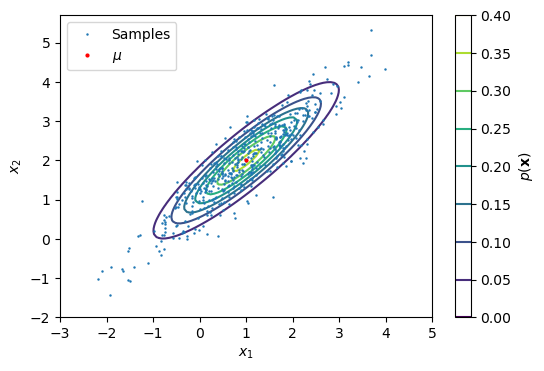

In [37]:
# Define the mean vector
mu = [1.0, 2.0]
# Define the covariance matrix
Sigma = np.array([[1.0, 0.9], [0.9, 1.0]])
# Define the random variable
X = st.multivariate_normal(mean=mu, cov=Sigma)
# Plot the contours
x1 = np.linspace(mu[0] - 4, mu[0] + 4, 100)
x2 = np.linspace(mu[1] - 4, mu[0] + 4, 100)
X1, X2 = np.meshgrid(x1, x2)
X_loc = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])
p_x = X.pdf(X_loc)
P_X = p_x.reshape(100, 100)
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
c = ax.contour(X1, X2, P_X)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(mappable=c, ax=ax, label='$p(\mathbf{x})$')
# Sample from X and plot the samples and mean
num_samples = 500
x_samples = X.rvs(size=num_samples)
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=1.5, label='Samples')
ax.plot(X.mean[0], X.mean[1], 'ro', markersize=2, label='$\mu$')
plt.legend(loc='best')
plt.show()

Notice the covariance matrix must be positive definite. This can be checked by calling **[``numpy.linalg.eigh()``](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)** method

In [38]:
# A positive definite matrix
Sigma_good = np.array([[1.0, 0.9], [0.9, 1.0]])
# A non-positive definite matrix
Sigma_bad = np.array([[0.4, 0.9], [0.9, 1.0]])
# Check their eigenvalues
print('Eigenvalues of Sigma_good is', np.linalg.eigh(Sigma_good)[0])
print('Eigenvalues of Sigma_bad is', np.linalg.eigh(Sigma_bad)[0])

Eigenvalues of Sigma_good is [0.1 1.9]
Eigenvalues of Sigma_bad is [-0.2486833  1.6486833]


If we would like to get the $N$-dimensional multivariate normal $$\mathbf{X}\sim\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$$ from an $N$-dimensional standard normal distribution $$\mathbf{Z}\sim\mathcal{N}(\mathbf{0},\mathbf{I})$$ by $$\mathbf{X}=\boldsymbol{\mu}+\mathbf{AZ}$$ where $$\boldsymbol{\Sigma}=\mathbf{AA}^T$$ Call **[``numpy.linalg.cholesky()``](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html)** method to decompose the matrix $\boldsymbol{\Sigma}$

In [39]:
Sigma = np.array([[1.0, 0.9], [0.9, 1.0]])
A = np.linalg.cholesky(Sigma)
Sigma == np.dot(A, A.T)

array([[ True,  True],
       [ True,  True]])

## Marginalization
Consider the $N$-dimensional multivariate normal $$\mathbf{X}\sim\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$$ where $\boldsymbol{\mu}$ is an $N$-dimensional vector and $\boldsymbol{\Sigma}$ is a *positive-definite matrix*. If we marginalize $X_i$, it will follow the normal distribution $$\mathcal{N}\sim(\mu_i,\Sigma_{i,i})$$

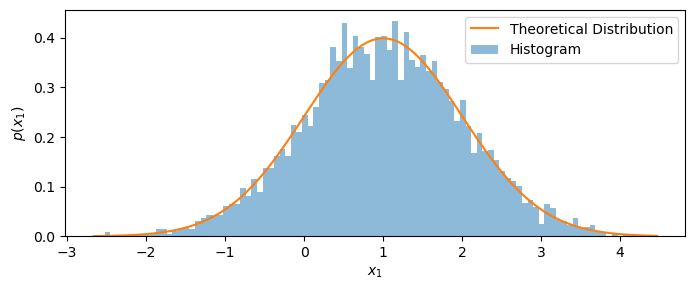

In [40]:
# Define the mean vector
mu = [1.0, 2.0]
# Define the covariance matrix
Sigma = np.array([[1.0, 0.9], [0.9, 1.0]])
# Define the random variable
X = st.multivariate_normal(mean=mu, cov=Sigma)
# Sample from X
num_samples = 5000
x_samples = X.rvs(size=num_samples)
# Marginalize along X1
x1_samples = x_samples[:, 0]
# Plot the histogram
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.hist(x1_samples, density=True, bins=100, alpha=0.5, label='Histogram')
# Define the theoretical distribution
X1_theory = st.norm(loc=mu[0], scale=np.sqrt(Sigma[0, 0]))
x1 = np.linspace(x1_samples.min(), x1_samples.max(), 100)
ax.plot(x1, X1_theory.pdf(x1), label='Theoretical Distribution')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$p(x_1)$')
plt.legend(loc='best')
plt.show()

## Conditioning
Consider the $N$-dimensional multivariate normal $$\mathbf{X}\sim\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$$ where $\boldsymbol{\mu}$ is an $N$-dimensional vector and $\boldsymbol{\Sigma}$ is a *positive-definite matrix*. 

Assume that $\boldsymbol{\mu}$ can be decomposed in two blocks of dimension $N_1$ and $N_2$ ($N_1+N_2=N$): $$\boldsymbol{\mu}=\begin{bmatrix}\boldsymbol{\mu}_1\\ \boldsymbol{\mu}_2\end{bmatrix}$$ Similarly for $\boldsymbol{\Sigma}$: $$\boldsymbol{\Sigma}=\begin{bmatrix}\boldsymbol{\Sigma}_{1,1}&\boldsymbol{\Sigma}_{1,2}\\ \boldsymbol{\Sigma}_{1,2}^T&\boldsymbol{\Sigma}_{1,1}\end{bmatrix}$$ The conditional PDF is $$p(\mathbf{x}_1|\mathbf{x}_2)=\frac{p(\mathbf{x}_1,\mathbf{x}_2)}{p(\mathbf{x}_2)}\propto p(\mathbf{x}_1,\mathbf{x}_2)=\mathcal{N}(\mathbf{x}_1|\pmb{\mu}_{1|\mathbf{x}_2},\pmb{\Sigma}_{1,1|\mathbf{x}_2})$$ Where $$\pmb{\mu}_{1|\mathbf{x}_2}=\pmb{\mu}_1+\pmb{\Sigma}_{1,2}\pmb{\Sigma}_{2,2}^{-1}(\mathbf{x}_2-\pmb{\mu}_2),\ \pmb{\Sigma}_{1,1|\mathbf{x}_2}=\pmb{\Sigma}_{1,1}-\pmb{\Sigma}_{1,2}\pmb{\Sigma}_{2,2}^{-1}\pmb{\Sigma}_{1,2}^T$$

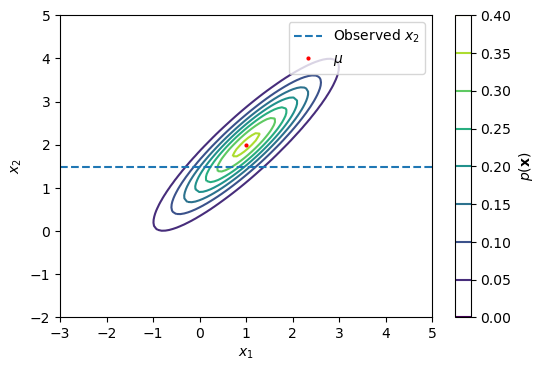

In [41]:
# Define the mean vector
mu = [1.0, 2.0]
# Define the covariance matrix
Sigma = np.array([[1.0, 0.9], [0.9, 1.0]])
# Define the random variable
X = st.multivariate_normal(mean=mu, cov=Sigma)
# Observe x2 component of a sample of X
x_sample = X.rvs()
x2_observed = x_sample[1]
x1_hidden = x_sample[0]
# Plot the contours
x1 = np.linspace(mu[0] - 4, mu[0] + 4, 100)
x2 = np.linspace(mu[1] - 4, mu[0] + 4, 100)
X1, X2 = np.meshgrid(x1, x2)
X_loc = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])
p_x = X.pdf(X_loc)
P_X = p_x.reshape(100, 100)
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
c = ax.contour(X1, X2, P_X)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(mappable=c, ax=ax, label='$p(\mathbf{x})$')
# Plot the observed x2 as a line
ax.plot(ax.set_xlim(), x2_observed * np.ones(2), '--', label='Observed $x_2$')
ax.plot(X.mean[0], X.mean[1], 'ro', markersize=2, label='$\mu$')
plt.legend(loc='best')
plt.show()

Let's see the theoretical conditional probability distribution

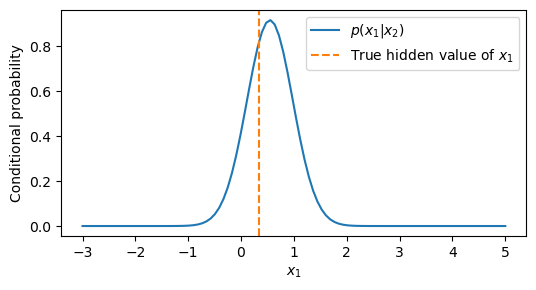

In [42]:
# Devide the matices into blocks
mu1 = mu[0]
mu2 = mu[1]
Sigma11 = Sigma[0, 0]
Sigma12 = Sigma[0, 1]
Sigma22 = Sigma[1, 1]
# Conditional mean
mu1_cond = mu1 + Sigma12 * Sigma22**(-1) * (x2_observed - mu2)
# Conditional variance
Sigma11_cond = Sigma11 - Sigma12 * Sigma22**(-1) * Sigma12
# Plot the theoretical distribution
X1_cond = st.norm(loc=mu1_cond, scale=np.sqrt(Sigma11_cond))
fig, ax = plt.subplots(figsize=(6, 3), dpi=100)
ax.plot(x1, X1_cond.pdf(x1), label='$p(x_1|x_2)$')
# Plot the true value of hidden x1
ax.plot(x1_hidden * np.ones(2),
        ax.set_ylim(),
        '--',
        label='True hidden value of $x_1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('Conditional probability')
plt.legend(loc='best')
plt.show()

%%latex
\newpage

# Monte Carlo Methods

## Estimating expectations
Based on the **strong law of large numbers**, we can estimate some complicated expectations. For example, we can estimate the integral $$I=\mathbb{E}[g(X)]=\int g(x)p(x)dx$$ where $X\sim p(x)$ and $g(x)$ is a function of $x$ by $$\bar{I}_N=\frac{g(X_1)+g(X_2)+\cdots+g(X_N)}{N}\overset{N\rightarrow\infty}{\longrightarrow}I,\ \text{a.s.}$$ where $X_1,X_2,\cdots$ are independent copies of $X$

For example, assume $X\sim U([0,1])$ and pick $$g(x)=(cos(50x)+sin(20x))^2$$ The correct value for the expectation can be found analytically and it is $$\mathbb{E}[g(x)]=0.965$$

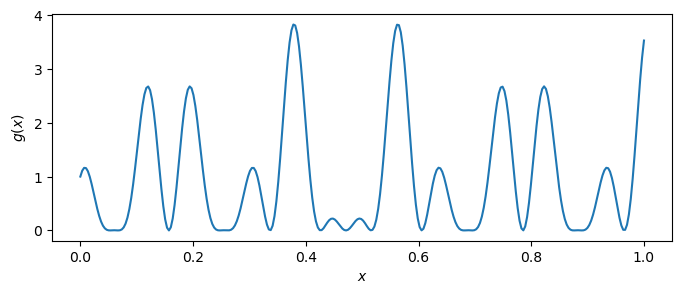

In [43]:
# Define the function
g = lambda x: (np.cos(50 * x) + np.sin(20 * x))**2
# Visualize this complicated function
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
x = np.linspace(0, 1, 300)
ax.plot(x, g(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$g(x)$')
plt.show()

Apply the Monte Carlo method for estimating integrals. We can call the **[``numpy.cumsum()``](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)** to get the cumulative sum of the elements along a given axis.

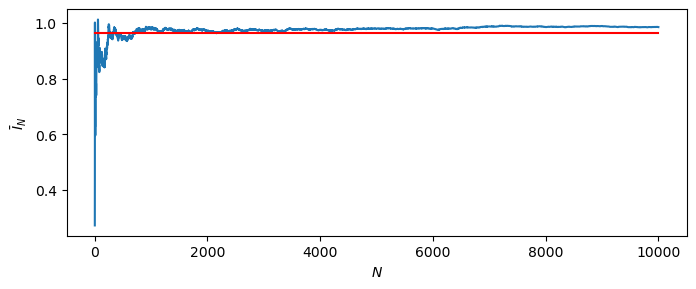

In [44]:
# Number of samples to take
N = 10000
# Get samples from U([0,1])
x_samples = np.random.rand(N)
# Evaluate the sample average for all sample sizes
I_running = np.cumsum(g(x_samples)) / np.arange(1, N + 1)
# Plot the running estimation
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.plot(np.arange(1, N + 1), I_running)
ax.plot(np.array([1, N + 1]), 0.965 * np.ones(2), 'r')
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{I}_N$')
plt.show()

## Estimating variances

Take a random variable $X\sim p(x)$ and some function $g(x)$, to estimate the **variance**: $$V=\mathbb{V}[g(x)]=\mathbb{E}\left[\left(g(X)-\mathbb{E}[g(X)]\right)^2\right]=\mathbb{E}\left[\left(g(X)-I\right)^2\right]=\mathbb{E}\left[g(x)^2\right]-I^2$$ Take independent identical copies of $X$:$$X_1,X_2,\cdots\sim p(x)$$ Estimate the mean using a sample average: $$\bar{I}_N=\frac{1}{N}\underset{i=1}{\overset{N}{\Sigma}}g(X_i)$$ Estimate the variance by: $$\bar{V}_N=\frac{1}{N}\underset{i=1}{\overset{N}{\Sigma}}g^2(X_i)-\bar{I}_N^2$$

Take the same example, assume $X\sim U([0,1])$ and pick $$g(x)=(cos(50x)+sin(20x))^2$$ The correct value for the variance is $$\mathbb{V}[g(x)]\approx 1.093$$ Apply the Monte Carlo method for estimating variances

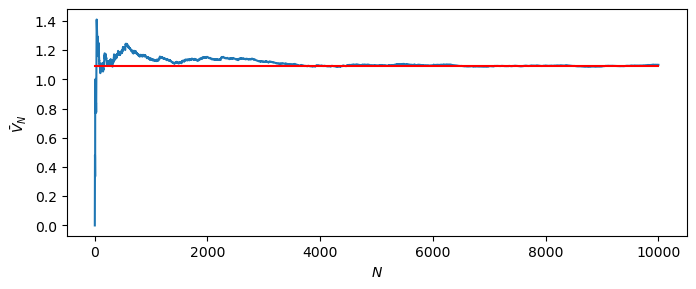

In [45]:
# Number of samples to take
N = 10000
# Get samples from U([0,1])
x_samples = np.random.rand(N)
# Evaluate the sample average for all sample sizes
I_running = np.cumsum(g(x_samples)) / np.arange(1, N + 1)
I2_running = np.cumsum(g(x_samples)**2) / np.arange(1, N + 1)
V_running = I2_running - I_running**2
# Plot the running estimation
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.plot(np.arange(1, N + 1), V_running)
ax.plot(np.array([1, N + 1]), 1.093 * np.ones(2), 'r')
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{V}_N$')
plt.show()

## Estimating the CDF

Consider estimating the cumulative distribution function of $Y=g(X)$:
$$
F(y) = p(Y\le y) = p(g(X) \le y).
$$
It can be written as an expectation using the indicator function:
$$
F(y) = \mathbb{E}[1_{[-\infty,y]}(g(X))].
$$
It means considering the random variables $1_{-[\infty,y]}(g(X_1)), 1_{-[\infty,y]}(g(X_2)),\dots$ which are independent and identically distributed.
By the strong law of large numbers:
$$
\bar{F}_N(y) = \frac{1}{N}\sum_{i=1}^N1_{[-\infty,y]}(g(X_i))\rightarrow F(y)\;\text{a.s.}.
$$
This estimate is called the empirical CDF.
$$
\bar{F}_N(y) = \frac{1}{N}\sum_{i=1}^N1_{[-\infty,y]}(g(X_i))=\frac{\text{number of }g(X_i) \le y}{N}.
$$

Take the same example, assume $X\sim U([0,1])$ and pick $$g(x)=(cos(50x)+sin(20x))^2$$

To calculate the empirical CDF, call the **[``ECDF()``](https://www.statsmodels.org/stable/generated/statsmodels.distributions.empirical_distribution.ECDF.html)** method

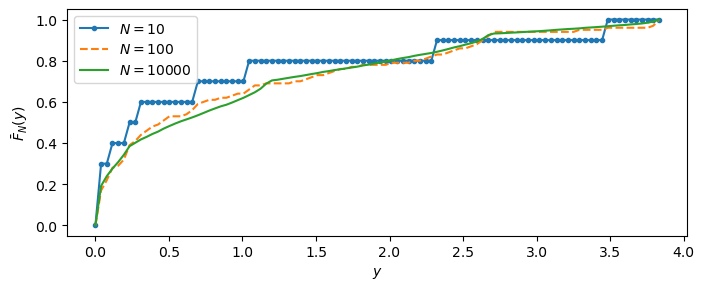

In [46]:
from statsmodels.distributions.empirical_distribution import ECDF

# Maximum number of samples to take
N = 10000
# Get samples from U([0,1])
x_samples = np.random.rand(N)
# Get the corresponding Y samples
y_samples = g(x_samples)
# Build ECDF with 10 samples
ecdf_10 = ECDF(y_samples[:10])
# Build ECDF with 100 samples
ecdf_100 = ECDF(y_samples[:100])
# Build ECDF with all samples
ecdf_N = ECDF(y_samples)
# Plot the ECDFs
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
y = np.linspace(y_samples.min(), y_samples.max(), 100)
ax.plot(y, ecdf_10(y), '.-', label='$N=10$')
ax.plot(y, ecdf_100(y), '--', label='$N=100$')
ax.plot(y, ecdf_N(y), label='$N=%d$' % N)
ax.set_xlabel('$y$')
ax.set_ylabel(r'$\bar{F}_N(y)$')
plt.legend(loc='best')
plt.show()

Try to use the empirical CDF to find the probability of that $Y$ takes specific values. For example, find $$p(1\le Y\le 3)=F(3)-F(1)\approx \bar{F}_N-\bar{F}_N(1)$$

In [47]:
# Estimate of the probability with 10 samples:
p_Y_10 = ecdf_10(3.0) - ecdf_10(1.0)
print('N = %d:\t\tp(1 <= Y <= 3) ~= %1.2f' % (10, p_Y_10))
# Estimate of the probability with 100 samples:
p_Y_100 = ecdf_100(3.0) - ecdf_100(1.0)
print('N = %d:\tp(1 <= Y <= 3) ~= %1.2f' % (100, p_Y_100))
# Estimate of the probability with all samples:
p_Y_N = ecdf_N(3.0) - ecdf_N(1.0)
print('N = %d:\tp(1 <= Y <= 3) ~= %1.2f' % (N, p_Y_N))

N = 10:		p(1 <= Y <= 3) ~= 0.20
N = 100:	p(1 <= Y <= 3) ~= 0.30
N = 10000:	p(1 <= Y <= 3) ~= 0.33


## Estimating the PDF via Histograms

Take a random variable $X\sim p(x)$ and some function $g(x)$, consider the derived random variable $Y=g(X)$, we would like to estimate the **probability density function** $p(y)$ of $Y$

Take $M$ small bins $[b_0,b_1],\cdots,[b_{M-1},b_M]$ in the $y$ space and approximate $p(y)$ with a constant inside each bin: $$\bar{p}_M(y)=\underset{j=1}{\overset{M}{\Sigma}}c_j1_{[b_{j-1},b_j]}(y)$$ The constants $c_j$ are: $$c_j=P(b_{j-1}\le Y\le b_j)=F(b_j)-F(b_j-1)$$
So, we can approximate the constants $c_j$ with the empirical CDF: $$\bar{c}_{j,N}=\bar{F}_N(b_j)-\bar{F}_N(b_{j-1})=\frac{\mathrm{number \ of \ samples\ that\ fall\ in\ bin\ }[b_{j-1},b_j]}{N}\rightarrow c_j \ \mathrm{a.s.}$$
Putting everything together the approximation becomes: $$\bar{p}_{M,N}(y)=\underset{j=1}{\overset{M}{\Sigma}}\bar{c}_{j,N}1_{[b_{j-1},b_j]}(y)$$

Take the same example, assume $X\sim U([0,1])$ and pick $$g(x)=(cos(50x)+sin(20x))^2$$ In practice, the rule of thumb is to make $N$ about ten times $M$.First try with $M=10,N=100$

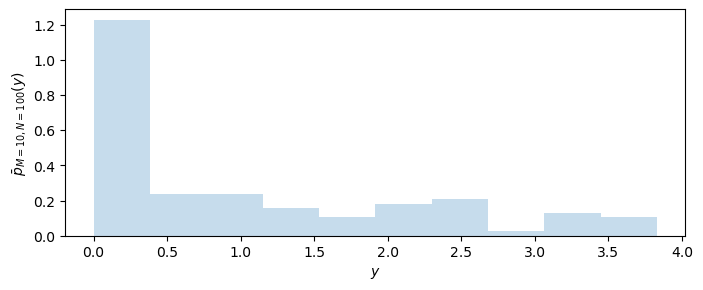

In [48]:
# Maximum number of samples to take
N = 100
# Number of bins
M = 10
# Get samples from U([0,1])
x_samples = np.random.rand(N)
# Get corresponding samples of Y
y_samples = g(x_samples)
# Plot the estimation
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.hist(y_samples, label='$N=%d$' % N, bins=M, density=True, alpha=0.25)
ax.set_xlabel('$y$')
ax.set_ylabel(r'$\bar{p}_{M=%d,N=%d}(y)$' % (M, N))
plt.show()

Increase to $M=100,N=1000$

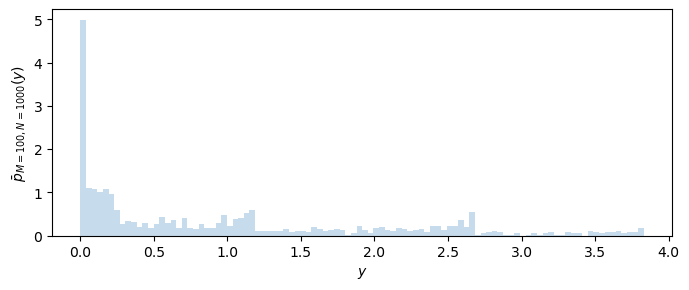

In [49]:
M, N = 100, 1000
x_samples = np.random.rand(N)
y_samples = g(x_samples)
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.hist(y_samples, label='$N=%d$' % N, bins=M, density=True, alpha=0.25)
ax.set_xlabel('$y$')
ax.set_ylabel(r'$\bar{p}_{M=%d,N=%d}(y)$' % (M, N))
plt.show()

Increase to $M=1000,N=10000$

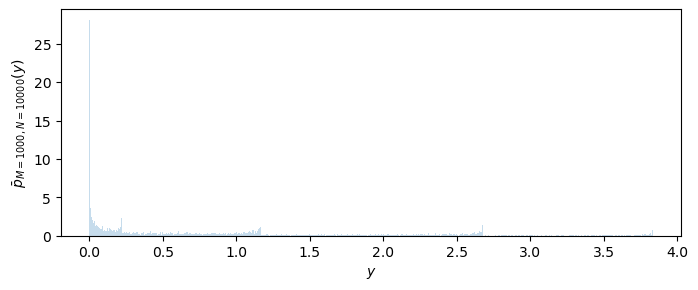

In [50]:
M, N = 1000, 10000
x_samples = np.random.rand(N)
y_samples = g(x_samples)
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.hist(y_samples, label='$N=%d$' % N, bins=M, density=True, alpha=0.25)
ax.set_xlabel('$y$')
ax.set_ylabel(r'$\bar{p}_{M=%d,N=%d}(y)$' % (M, N))
plt.show()

## Estimating predictive quantiles
To find the $q$-predictive quantile of $Y$:$$F_Y(\mu_q)=\frac{q}{100}$$ Turn it into a root finding problem: $$F(\mu_q)-\frac{q}{100}=0$$ Take $X_1,X_2,\cdots$ independent identical copies of $X$, fins the sampling estimate of the CDF of $Y=g(X)$ denoted by $$\bar{F}_N(y)$$ Then numerically solve the root finding problem and obtain the quantile $\bar{\mu}_{q,N}$ 

Take the same example, assume $X\sim U([0,1])$ and pick $$g(x)=(cos(50x)+sin(20x))^2$$ Use **[``np.quantile()``](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)** to solve the root finding problem. Notice we do not call the **``ECDF()``** method to actually estimate the empirical CDF if we only want the quantiles.

In [51]:
# Maximum number of samples to take
N = 10000
# Get samples from U([0,1])
x_samples = np.random.rand(N)
# Get corresponding samples of Y
y_samples = g(x_samples)
# Find the 2.5%, 50% and 97.5% quantiles
mu_025 = np.quantile(y_samples, 2.5 / 100)
print('mu_025 = %1.2f' % mu_025)
mu_500 = np.quantile(y_samples, 50.0 / 100)
print('mu_500 = %1.2f' % mu_500)
mu_975 = np.quantile(y_samples, 97.5 / 100)
print('mu_975 = %1.2f' % mu_975)

mu_025 = 0.00
mu_500 = 0.61
mu_975 = 3.65


Plot the quantiles on the histogram of samples from $Y$

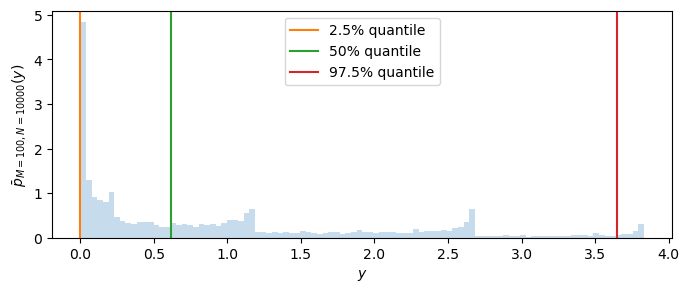

In [52]:
# Here use a relatively samll bin number for better visualization
M = 100
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.hist(y_samples, bins=M, density=True, alpha=0.25)
ax.set_xlabel('$y$')
ax.set_ylabel(r'$\bar{p}_{M=%d,N=%d}(y)$' % (M, N))
ax.plot(mu_025*np.ones(2),ax.set_ylim(),label='2.5% quantile')
ax.plot(mu_500*np.ones(2),ax.set_ylim(),label='50% quantile')
ax.plot(mu_975*np.ones(2),ax.set_ylim(),label='97.5% quantile')
plt.legend(loc='best')
plt.show()

The predictive quantiles are often summarized using box plots by calling the **[``boxplot()``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)** method

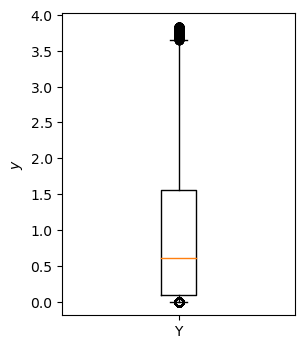

In [53]:
fig,ax=plt.subplots(figsize=(3,4),dpi=100)
ax.boxplot(y_samples,whis=[2.5,97.5],labels=['Y'])
ax.set_ylabel('$y$')
plt.show()

In the box plot:
- The $y$-axis indicates possible values
- The orange line indicates the median
- The box encapsulates 50% of the probability around the median
- The whiskers are extreme quantiles (here selected to be 2.5% and 97.5% quantiles)
- The plot also shows the samples that fall outside the extreme quantiles

## Quantifying epistemic uncertainties in Monte Carlo estimates
Based on the *strong law of large numbers*, we can estimate use sampling to estimate expectations. For example, we can estimate the integral $$I=\mathbb{E}[g(X)]=\int g(x)p(x)dx$$ where $X\sim p(x)$ and $g(x)$ is a function of $x$ by $$\bar{I}_N=\frac{g(X_1)+g(X_2)+\cdots+g(X_N)}{N}\overset{N\rightarrow\infty}{\longrightarrow}I,\ \text{a.s.}$$ where $X_1,X_2,\cdots$ are independent copies of $X$ Also, we can estimate the variance by: $$\bar{V}_N=\frac{1}{N}\underset{i=1}{\overset{N}{\Sigma}}g^2(X_i)-\bar{I}_N^2$$

Assume $Y_1=g(X_1),Y_2=g(X_2),\cdots,Y_N=g(X_N)$ are i.i.d. random variables with
$$\mathbb{E}[Y_i]=\mathbb{E}[g(X_i)]=I,\mathbb{V}[Y_i]=\sigma^2\le+\infty$$
According to the *central limit theorem* (details are skipped here and are provided in *02 Probability Theory*):
$$I\sim\mathcal{N}(\bar{I}_N,\frac{\bar{\sigma}_N^2}{N})\ \text{for large }N$$

In practice, we usually write something like:
$$I\approx\bar{I}_N\pm\frac{1.96}{\sqrt{N}}\bar{\sigma}_N$$ with about $95\%$ probability

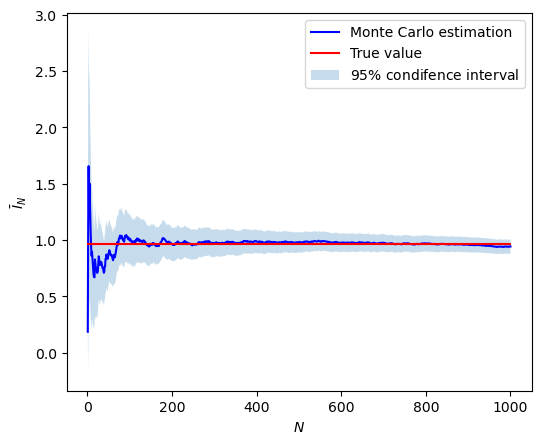

In [54]:
# Number of samples to take
N = 1000
# Get samples from U([0,1])
x_samples = np.random.rand(N)
# Get corresponding samples of Y
y_samples = g(x_samples)
# Evaluate the sample average for all sample sizes
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)
I2_running = np.cumsum(y_samples**2) / np.arange(1, N + 1)
V_running = I2_running - I_running**2
# Get the lower bound and upper bound of the 95% condidence interval
I_lb_running = I_running - 1.96 * np.sqrt(V_running/np.arange(1,N+1))
I_ub_running = I_running + 1.96 * np.sqrt(V_running/np.arange(1,N+1))
# Plot all the estimates
fig, ax = plt.subplots(figsize=(6,5),dpi=100)
# 95% confidence interval
ax.fill_between(np.arange(1, N + 1), I_lb_running, I_ub_running, alpha=0.25,label='$95\%$ condifence interval')
# Monte Carlo estimation for expectation
ax.plot(np.arange(1, N+1), I_running, 'b',label='Monte Carlo estimation')
# True value of expectation
ax.plot(np.arange(1, N+1), [0.965] * N, color='r',label='True value')
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{I}_N$')
plt.legend(loc='best')
plt.show()